# Analisis Faktor Pengaruh dan Pemodelan Regresi pada Dataset Harga Tiket Pesawat

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def print_coef_std_err(result):
    coef = result.params
    std_err = result.bse
    
    df = pd.DataFrame(
        data = np.transpose([coef, std_err]),
        index=coef.index,
        columns=['coef', 'std_err']
    )

    return df

# Introduction and Background

This dataset is for plane price prediction. This dataset contain some important features of different model plane. These features are important for a plane price. To predict the price use those features. This is a machine learning regression problem.

# Data Loading and Pre-processing

## Data Loading

In [3]:
airplane = pd.read_csv("Plane Price.csv")
airplane.head()

Model Name Engine Type HP or lbs thr ea engine  \
0  100 Darter (S.L. Industries)      Piston                     145   
1                   7 CCM Champ      Piston                      85   
2  100 Darter (S.L. Industries)      Piston                      90   
3                    7 AC Champ      Piston                      85   
4  100 Darter (S.L. Industries)      Piston                      65   

  Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
0             104                91.0               46.0            36   
1              89                83.0               44.0            15   
2              90                78.0               37.0            19   
3              88                78.0               37.0            19   
4              83                74.0               33.0            14   

  All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
0                   450                  900.0             1300.0   
1                   600                  720.0              800.0   
2                   650                  475.0              850.0   
3                   620                  500.0              850.0   
4                   370                  632.0              885.0   

  Landing over 50ft Empty weight lbs Length ft/in Wing span ft/in Range N.M.  \
0             2,050            1,180         25/3            37/5        370   
1             1,350              820         20/7            36/1        190   
2             1,300              810         21/5            35/0        210   
3             1,300              800         21/5            35/0        210   
4             1,220              740         21/5            35/0        175   

       Price  
0  1300000.0  
1  1230000.0  
2  1600000.0  
3  1300000.0  
4  1250000.0

In [4]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

Dataset ini mencakup beberapa variabel, antara lain:

1. Model Name (obj) : nama model pesawat.
2. Engine Type (obj) : tipe mesin yang digunakan.
3. HP or lbs thr ea engine (float) : daya dorong mesin.
4. Max speed Knots (float) : kecepatan maksimum pesawat.
5. Rcmnd cruise Knots (float)
6. Stall Knots dirty (float) : pesawat terbang dengan kecepatan lebih lambat (dalam knot) saat dikonfigurasi dalam keadaan kotor.
7. Fuel gal/lbs (float) : kapasitas bahan bakar.
8. All eng rate of climb (float) : kecepatan vertikal di mana sebuah pesawat dapat naik dengan kekuatan penuh.
9. Eng out rate of climb (float) : Tingkat pendakian dalam penerbangan mengacu pada kecepatan vertikal di mana sebuah pesawat dapat naik dengan kekuatannya sendiri.
10. Takeoff over 50ft (float) : jarak minimum yang diperlukan pesawat untuk lepas landas dan melewati rintangan setinggi 50 kaki.
11. Landing over 50ft (float)
12. Empty weight lbs (float)
13. Length ft/in (obj)
14. Wing span ft/in (obj)
15. Range N.M. (float)
16. Price (float) : harga pesawat.
     

## Data Preprocessing

### Pengecekan Data Kosong dan Data Duplikat

In [5]:
airplane.isna().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

In [6]:
airplane = airplane.dropna()
airplane.isna().sum()

Model Name                 0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            0
Rcmnd cruise Knots         0
Stall Knots dirty          0
Fuel gal/lbs               0
All eng rate of climb      0
Eng out rate of climb      0
Takeoff over 50ft          0
Landing over 50ft          0
Empty weight lbs           0
Length ft/in               0
Wing span ft/in            0
Range N.M.                 0
Price                      0
dtype: int64

In [7]:
airplane.duplicated().sum()

0

### Pengecekan Kualitas Data

#### Pengecekan Tipe Data

In [8]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               421 non-null    object 
 1   Engine Type              421 non-null    object 
 2   HP or lbs thr ea engine  421 non-null    object 
 3   Max speed Knots          421 non-null    object 
 4   Rcmnd cruise Knots       421 non-null    float64
 5   Stall Knots dirty        421 non-null    float64
 6   Fuel gal/lbs             421 non-null    int64  
 7   All eng rate of climb    421 non-null    object 
 8   Eng out rate of climb    421 non-null    float64
 9   Takeoff over 50ft        421 non-null    float64
 10  Landing over 50ft        421 non-null    object 
 11  Empty weight lbs         421 non-null    object 
 12  Length ft/in             421 non-null    object 
 13  Wing span ft/in          421 non-null    object 
 14  Range N.M.               4

Indeks kolom 2, 3, 7, 10, 11, 14, dan 14 terbaca sebagai object. Padahal isi datanya merupakan numerik. Untuk itu, akan dilakukan pengecekan datanya.

##### Pengecekan Indeks Kolom 1

In [9]:
airplane['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston'], dtype=object)

In [10]:
airplane['Engine Type'][airplane['Engine Type']=='piston'] = 'Piston'
airplane['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet'], dtype=object)

##### Pengecekan Indeks Kolom 2

In [11]:
airplane['HP or lbs thr ea engine'].unique()

array(['145', '85', '90', '65', '350', '290', '600', '450', '300', '275',
       '245', '220', '150', '115', '160', '180', '108', '850', '715',
       '680', '750', '550', '500', '380', '340', '295', '260', '325',
       '310', '285', '250', '240', '225', '205', '196', '185', '200',
       '165', '230', '190', '3,500', '2,950', '2,850', '4,000', '3,650',
       '1,900', '625', '375', '210', '675', '235', '175', '195', '110',
       '100', '270', '265', '4,750', '4,500', '3,700', '5,200', '4,125',
       '4,250', '4,315', '3,230', '620', '135', '700', '900', '1,000',
       '1000 dry', '13,850', '11,400', '3,100', '2,500', '778', '727',
       '724', '776', '705', '280', '1200', '720'], dtype=object)

terdapat data bertuliskan 1000 dry. Kita akan mengatasinya dengan menghapus kata dry.

In [12]:
# Cari Data 
airplane[airplane['HP or lbs thr ea engine']=='1000 dry']

Model Name Engine Type HP or lbs thr ea engine  \
410  100 Darter (S.L. Industries)     Propjet                1000 dry   

    Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
410             283               261.0               87.0           648   

    All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
410                 2,440                 2850.0             2532.0   

    Landing over 50ft Empty weight lbs Length ft/in Wing span ft/in  \
410            14,000            9,100         59/4            57/0   

    Range N.M.      Price  
410      2,040  3000000.0

In [13]:
airplane['HP or lbs thr ea engine'][airplane['HP or lbs thr ea engine']=='1000 dry'] = 1000
airplane.loc[410]

Model Name                 100 Darter (S.L. Industries)
Engine Type                                     Propjet
HP or lbs thr ea engine                            1000
Max speed Knots                                     283
Rcmnd cruise Knots                                261.0
Stall Knots dirty                                  87.0
Fuel gal/lbs                                        648
All eng rate of climb                             2,440
Eng out rate of climb                            2850.0
Takeoff over 50ft                                2532.0
Landing over 50ft                                14,000
Empty weight lbs                                  9,100
Length ft/in                                       59/4
Wing span ft/in                                    57/0
Range N.M.                                        2,040
Price                                         3000000.0
Name: 410, dtype: object

Selain itu, terdapat data dengan simbol koma. Kita harus mengatasinya dengan menghapus tanda koma tersebut.

In [14]:
airplane[airplane['HP or lbs thr ea engine'].str.contains(',', na=False)].head()

Model Name Engine Type HP or lbs thr ea engine  \
156          T 310 P turbocharged         Jet                   3,500   
157                         310 Q         Jet                   3,500   
158  100 Darter (S.L. Industries)         Jet                   3,500   
159  100 Darter (S.L. Industries)         Jet                   3,500   
160  100 Darter (S.L. Industries)         Jet                   2,950   

    Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
156             491               460.0               99.0          7400   
157             477               441.0              105.0          7431   
158             471               460.0               99.0          6198   
159             477               441.0              105.0          6171   
160             478               441.0               79.0          5373   

    All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
156                 4,340                 4972.0             3075.0   
157                 5,100                 4080.0             3105.0   
158                 4,760                 4972.0             3075.0   
159                 5,100                 4080.0             3105.0   
160                 6,110                 2880.0             2220.0   

    Landing over 50ft Empty weight lbs Length ft/in Wing span ft/in  \
156            18,300            9,838         48/8            39/6   
157            17,000            8,802         48/7            39/5   
158            18,300            9,838         48/8            39/6   
159            17,000            8,762         48/7            39/5   
160            15,000            8,157         47/7            43/9   

    Range N.M.      Price  
156      2,289  4500000.0  
157      2,289  4500000.0  
158      1,818  4500000.0  
159      1,818  4500000.0  
160      1,546  4790000.0

In [15]:
airplane['HP or lbs thr ea engine'] = airplane['HP or lbs thr ea engine'].replace({',': ''}, regex=True)
airplane['HP or lbs thr ea engine'].unique()


array(['145', '85', '90', '65', '350', '290', '600', '450', '300', '275',
       '245', '220', '150', '115', '160', '180', '108', '850', '715',
       '680', '750', '550', '500', '380', '340', '295', '260', '325',
       '310', '285', '250', '240', '225', '205', '196', '185', '200',
       '165', '230', '190', '3500', '2950', '2850', '4000', '3650',
       '1900', '625', '375', '210', '675', '235', '175', '195', '110',
       '100', '270', '265', '4750', '4500', '3700', '5200', '4125',
       '4250', '4315', '3230', '620', '135', '700', '900', '1000', 1000,
       '13850', '11400', '3100', '2500', '778', '727', '724', '776',
       '705', '280', '1200', '720'], dtype=object)

In [16]:
airplane['HP or lbs thr ea engine'] = airplane['HP or lbs thr ea engine'].astype(float)
airplane['HP or lbs thr ea engine'].info()

<class 'pandas.core.series.Series'>
Int64Index: 421 entries, 0 to 516
Series name: HP or lbs thr ea engine
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: float64(1)
memory usage: 22.7 KB


##### Pengecekan Indeks Kolom 3

In [17]:
airplane['Max speed Knots'].unique()

array(['104', '89', '90', '88', '83', '78', '264', '262', '257', '271',
       '220', '128', '114', '112', '113', '99', '116', '109', '117',
       '168', '148', '136', '130', '120', '122', '294', '290', '265',
       '248', '279', '267', '250', '247', '223', '243', '214', '216',
       '219', '208', '200', '246', '249', '204', '203', '209', '186',
       '178', '177', '261', '256', '231', '252', '210', '201', '205',
       '183', '171', '213', '184', '179', '217', '169', '165', '160',
       '181', '182', '170', '145', '140', '137', '127', '123', '110',
       '106', '193', '174', '166', '167', '147', '491', '477', '471',
       '478', '475', '464', '461', '474', '469', '488', '.85 Mach', '472',
       '.71 Mach', '295', '263', '245', '240', '235', '239', '232', '230',
       '229', '227', '226', '237', '238', '207', '206', '191', '211',
       '202', '172', '173', '159', '224', '150', '155', '157', '156',
       '151', '154', '152', '153', '107', '105', '91', '94', '131', '103',
    

Dari sini, dapat kita temui bahwa terdapat data dengan tanda `.` dan karakter `Mach`. Hal ini harus diatasi dengan menghapusnya. Sebelum itu, perlu dilihat dahulu datanya seperti apa.

In [18]:
airplane[airplane['Max speed Knots'].str.contains('Mach', na=False)][['Model Name','Max speed Knots','Price']]

Model Name Max speed Knots      Price
175                    100 Darter (S.L. Industries)        .85 Mach  5100000.0
187  U206E,F, float ('75-'76 specs) '76=+4 gal fuel        .71 Mach  4100000.0
400                        H-Rangemaster (1975-'76)        .64 Mach  4100000.0

Mach merupakan suatu satuan kecepatan. 1 mach = 661.47 knot.

In [19]:
airplane['Max speed Knots'] = airplane['Max speed Knots'].replace({' Mach': ''}, regex=True)
airplane['Max speed Knots'] = airplane['Max speed Knots'].astype(float)
airplane['Max speed Knots'].info()

<class 'pandas.core.series.Series'>
Int64Index: 421 entries, 0 to 516
Series name: Max speed Knots
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: float64(1)
memory usage: 22.7 KB


In [20]:
mach = 661.47
airplane.loc[175]['Max speed Knots'] = airplane.loc[175]['Max speed Knots'] * mach
airplane.loc[187]['Max speed Knots'] = airplane.loc[187]['Max speed Knots'] * mach
airplane.loc[400]['Max speed Knots'] = airplane.loc[400]['Max speed Knots'] * mach
airplane.loc[[175,187,400]]

C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\1748779058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane.loc[175]['Max speed Knots'] = airplane.loc[175]['Max speed Knots'] * mach
C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\1748779058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane.loc[187]['Max speed Knots'] = airplane.loc[187]['Max speed Knots'] * mach
C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\1748779058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Model Name Engine Type  \
175                    100 Darter (S.L. Industries)         Jet   
187  U206E,F, float ('75-'76 specs) '76=+4 gal fuel         Jet   
400                        H-Rangemaster (1975-'76)         Jet   

     HP or lbs thr ea engine  Max speed Knots  Rcmnd cruise Knots  \
175                   4000.0             0.85               476.0   
187                   1900.0             0.71               380.0   
400                    900.0             0.64               426.0   

     Stall Knots dirty  Fuel gal/lbs All eng rate of climb  \
175               97.0          7385                 4,442   
187               85.0          3220                 3,311   
400               69.0          1686                 3,314   

     Eng out rate of climb  Takeoff over 50ft Landing over 50ft  \
175                 4690.0             2910.0            22,450   
187                 3080.0             2750.0            10,400   
400                 2297.0             2155.0             5,920   

    Empty weight lbs Length ft/in Wing span ft/in Range N.M.      Price  
175           13,700         55/5            53/5      2,300  5100000.0  
187            6,550         42/6            46/8      1,485  4100000.0  
400            3,550         33/6           37/11      1,300  4100000.0

##### Pengecekan Indeks Kolom 7

In [21]:
airplane['All eng rate of climb'].unique()

array(['450', '600', '650', '620', '370', '360', '1,820', '1,755',
       '1,460', '1,700', '1,800', '1,600', '1,060', '990', '700', '496',
       '435', '640', '550', '1,120', '1,140', '1,145', '725', '1,160',
       '850', '660', '705', '765', '1,000', '2,450', '1,963', '2,200',
       '2,455', '2,380', '1,870', '2,137', '1,955', '2,000', '1,900',
       '1,275', '1,585', '1,300', '1,375', '1,601', '1,615', '1,400',
       '1,410', '1,250', '1,190', '1,270', '1,320', '1,450', '1,475',
       '1,529', '1,424', '1,461', '1,750', '1,660', '2,020', '1,682',
       '1,670', '1,693', '1,630', '1,248', '1,049', '1,165', '1,210',
       '1,030 w/3bld', '1,015', '1,225', '1,136', '1,200', '1,150',
       '1,170', '1,100', '890', '950', '1,167 w/3bld', '930', '980',
       '960', '1,010', '927', '891', '862', '880', '792', '728', '720',
       '680', '900', '1,085', '1,840', '1,500', '4,340', '5,100', '4,760',
       '6,110', '6,350', '6,830', '6,050', '7,100', '7,220', '6,800',
       '6,900'

In [22]:
airplane['All eng rate of climb'] = airplane['All eng rate of climb'].replace({',': ''}, regex=True)
airplane['All eng rate of climb'] = airplane['All eng rate of climb'].replace({' w/3bld': ''}, regex=True)
airplane['All eng rate of climb'] = airplane['All eng rate of climb'].astype(float)
airplane['All eng rate of climb'].info()

<class 'pandas.core.series.Series'>
Int64Index: 421 entries, 0 to 516
Series name: All eng rate of climb
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: float64(1)
memory usage: 22.7 KB


##### Pengecekan Indeks Kolom 10

In [23]:
airplane['Landing over 50ft'].unique()

array(['2,050', '1,350', '1,300', '1,220', '1,250', '6,315', '6,000',
       '5,700', '5,500', '4,500', '3,750', '3,600', '1,450', '1,400',
       '1,650', '3,800', '2,400', '2,200', '1,560', '1,500', '12,500',
       '11,800', '11,500', '10,600', '10,950', '10,100', '9,650', '9,300',
       '9,000', '8,800', '8,500', '8,000', '8,200', '7,700', '6,775',
       '6,725', '9,900', '9,700', '8,750', '7,300', '7,000', '6,300',
       '6,200', '6,100', '5,400', '5,990', '5,300', '5,100', '4,880',
       '4,200', '4,100', '3,900', '3,850', '3,650', '3,400', '3,300',
       '3,125', '2,950', '2,900', '2,775', '2,700', '2,650', '2,550',
       '3,050', '3,000', '2,750', '2,450', '2,350', '2,300', '2,150',
       '1,675', '3,325', '3,200', '2,600', '2,100', '18,300', '17,000',
       '15,000', '13,500', '12,900', '13,000', '22,450', '22,000',
       '10,400', '9,850', '7,450', '6,840', '6,800', '6,750', '6,350',
       '6,500', '8,400', '6,850', '5,975', '5,200', '4,990', '4,600',
       '5,000'

In [24]:
airplane['Landing over 50ft'] = airplane['Landing over 50ft'].replace({',': ''}, regex=True)
airplane['Landing over 50ft'] = airplane['Landing over 50ft'].astype(float)
airplane['Landing over 50ft'].info()

<class 'pandas.core.series.Series'>
Int64Index: 421 entries, 0 to 516
Series name: Landing over 50ft
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: float64(1)
memory usage: 22.7 KB


##### Pengecekan Indeks Kolom 11

In [25]:
airplane['Empty weight lbs'].unique()

array(['1,180', '820', '810', '800', '740', '786', '4,275', '4,125',
       '4,056', '3,958', '3,750', '3,737', '3,160', '3,100', '2,870',
       '2,410', '2,400', '2,300', '2,200', '930', '900', '833', '1,140',
       '1,050', '1,150', '1,067', '2,588', '1,360', '1,323', '1,271',
       '975', '1,007', '3,400', '7,538', '7,082', '6,797', '6,440',
       '6,647', '6,549', '5,996', '5,765', '5,685', '5,680', '6,035',
       '5,277', '5,120', '4,900', '4,800', '4,995', '4,980', '4,640',
       '4,425', '4,175', '4,100', '5,845', '5,910', '6,150', '5,770',
       '4,480', '4,460', '3,956', '3,940', '3,800', '4,026', '3,985',
       '3,788', '3,780', '3,443', '3,361', '3,700', '3,650', '3,291',
       '3,075', '3,236', '2,960', '2,650', '2,635', '2,460', '2,338',
       '2,278', '2,247', '2,195', '1,980', '2,027', '1,960', '1,950',
       '1,915', '1,855', '1,832', '1,820', '1,722', '1,650', '1,575',
       '1,458', '1,935', '1,918', '2,125', '1,862', '1,775', '1,854',
       '1,745', '1,7

In [26]:
airplane['Empty weight lbs'] = airplane['Empty weight lbs'].replace({',': ''}, regex=True)
airplane['Empty weight lbs'] = airplane['Empty weight lbs'].astype(float)
airplane['Empty weight lbs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 421 entries, 0 to 516
Series name: Empty weight lbs
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: float64(1)
memory usage: 22.7 KB


##### Pengecekan Indeks Kolom 15

In [27]:
airplane['Range N.M.'].unique()

array(['370', '190', '210', '175', '180', '868', '1,020', '1,101',
       '1,174', '1,200', '148', '226', '117', '174', '410', '400', '360',
       '411', '480', '301', '350', '680', '530', '428', '503', '348',
       '275', '1,972', '1,870', '1,080', '1,000', '1,005', '1,235',
       '1,290', '1,120', '1,185', '1,160', '1,270', '902', '656', '716',
       '746', '755', '630', '1,010', '824', '622', '880', '638', '632',
       '787', '813', '670', '726', '733', '722', '1,013', '1,130',
       '1,104', '1,109', '737', '934', '550', '739', '763', '745', '661',
       '843', '957', '800', '720', '697', '510', '600', '536', '580',
       '543', '535', '495', '492', '470', '513', '520', '717', '568',
       '647', '591', '704', '643', '565', '760', '483', '639', '452',
       '435', '2,289', '1,818', '1,546', '1,450', '1,431', '1,525',
       '1,385', '1,001', '730', '1,100', '2,300', '2,600', '1,485',
       '2,193', '1,461', '1,197', '845', '826', '1,099', '1,090', '908',
       '553', '8

In [28]:
airplane['Range N.M.'] = airplane['Range N.M.'].replace({',': ''}, regex=True)
airplane['Range N.M.'] = airplane['Range N.M.'].astype(float)
airplane['Range N.M.'].info()

<class 'pandas.core.series.Series'>
Int64Index: 421 entries, 0 to 516
Series name: Range N.M.
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: float64(1)
memory usage: 22.7 KB


##### Pengecekan Ulang Tipe Data

In [29]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               421 non-null    object 
 1   Engine Type              421 non-null    object 
 2   HP or lbs thr ea engine  421 non-null    float64
 3   Max speed Knots          421 non-null    float64
 4   Rcmnd cruise Knots       421 non-null    float64
 5   Stall Knots dirty        421 non-null    float64
 6   Fuel gal/lbs             421 non-null    int64  
 7   All eng rate of climb    421 non-null    float64
 8   Eng out rate of climb    421 non-null    float64
 9   Takeoff over 50ft        421 non-null    float64
 10  Landing over 50ft        421 non-null    float64
 11  Empty weight lbs         421 non-null    float64
 12  Length ft/in             421 non-null    object 
 13  Wing span ft/in          421 non-null    object 
 14  Range N.M.               4

#### Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1b129baaa10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b129baaf50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b129baa770>,
 'medians': [<matplotlib.lines.Line2D at 0x1b129bab490>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b129bab730>,
 'means': []}

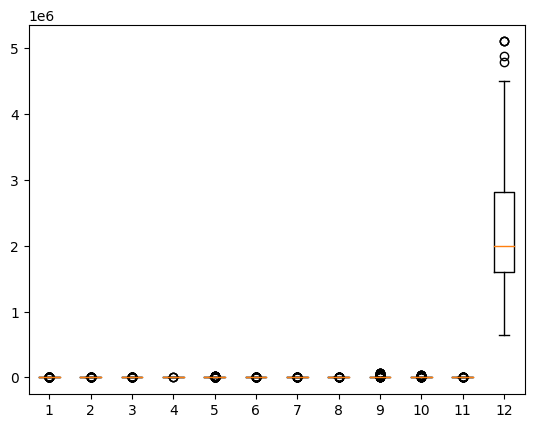

In [30]:
kolom = ['HP or lbs thr ea engine',
       'Max speed Knots', 'Rcmnd cruise Knots', 'Stall Knots dirty',
       'Fuel gal/lbs', 'All eng rate of climb', 'Eng out rate of climb',
       'Takeoff over 50ft', 'Landing over 50ft', 'Empty weight lbs',
       'Range N.M.','Price']
plt.boxplot(airplane[kolom])

### Transformasi Data

Transformasi Log

{'whiskers': [<matplotlib.lines.Line2D at 0x1b129fb53c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b129fb5900>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b129fb5120>,
 'medians': [<matplotlib.lines.Line2D at 0x1b129fb5e40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b129fb60e0>,
 'means': []}

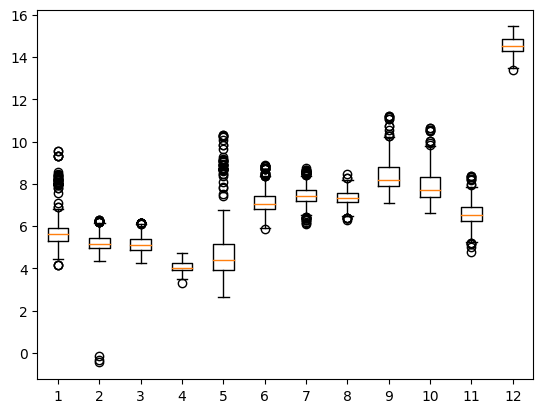

In [31]:
airplanelog = airplane.copy()
airplanelog[kolom] = np.log(airplanelog[kolom])

plt.boxplot(airplanelog[kolom])

Transformasi Standarisasi

{'whiskers': [<matplotlib.lines.Line2D at 0x1b12ccbd0c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b12ccbd600>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b12ccbce20>,
 'medians': [<matplotlib.lines.Line2D at 0x1b12ccbdb40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b12ccbdde0>,
 'means': []}

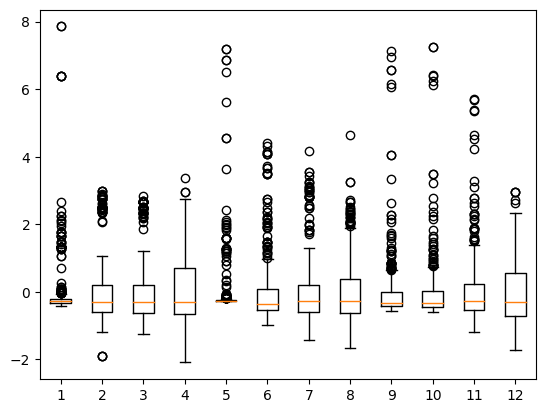

In [32]:
from sklearn.preprocessing import StandardScaler

airplanest = airplane.copy()
airplanest[kolom] = StandardScaler().fit_transform(airplanest[kolom])

plt.boxplot(airplanest[kolom])

Transformasi Log menghasilkan data dengan sebaran yang lebih rapat pada setiap datanya. Oleh karena itu, akan digunakan hasil transformasi log pada saat pemodelan regresi nanti.

# Exploratory Data Analysis

In [33]:
airplane.describe().round(2)

HP or lbs thr ea engine  Max speed Knots  Rcmnd cruise Knots  \
count                   421.00           421.00              421.00   
mean                    745.15           206.83              194.49   
std                    1669.85           108.31               99.10   
min                      65.00             0.64               70.00   
25%                     200.00           141.00              131.00   
50%                     280.00           175.00              166.00   
75%                     375.00           230.00              215.00   
max                   13850.00           530.00              476.00   

       Stall Knots dirty  Fuel gal/lbs  All eng rate of climb  \
count             421.00        421.00                 421.00   
mean               60.65       1143.07                1597.30   
std                16.10       3953.52                1279.67   
min                27.00         14.00                 360.00   
25%                50.00         50.00                 914.00   
50%                56.00         80.00                1155.00   
75%                72.00        175.00                1690.00   
max               115.00      29500.00                7220.00   

       Eng out rate of climb  Takeoff over 50ft  Landing over 50ft  \
count                 421.00             421.00             421.00   
mean                 1978.94            1681.34            6780.63   
std                  1064.25             681.52            9569.88   
min                   457.00             540.00            1220.00   
25%                  1350.00            1250.00            2650.00   
50%                  1675.00            1495.00            3600.00   
75%                  2200.00            1940.00            6750.00   
max                  6400.00            4850.00           75000.00   

       Empty weight lbs  Range N.M.       Price  
count            421.00      421.00      421.00  
mean            3984.89      852.75  2282374.11  
std             5327.53      626.45   952529.31  
min              740.00      117.00   650000.00  
25%             1610.00      513.00  1600000.00  
50%             2204.00      680.00  1990000.00  
75%             4184.00     1001.00  2810000.00  
max            42500.00     4420.00  5100000.00

In [34]:
airplane['Model Name'].unique().__len__()

229

In [35]:
airplane['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet'], dtype=object)

In [36]:
airplane['Wing span ft/in'].unique().__len__()

103

In [37]:
airplane['Length ft/in'].unique().__len__()

149

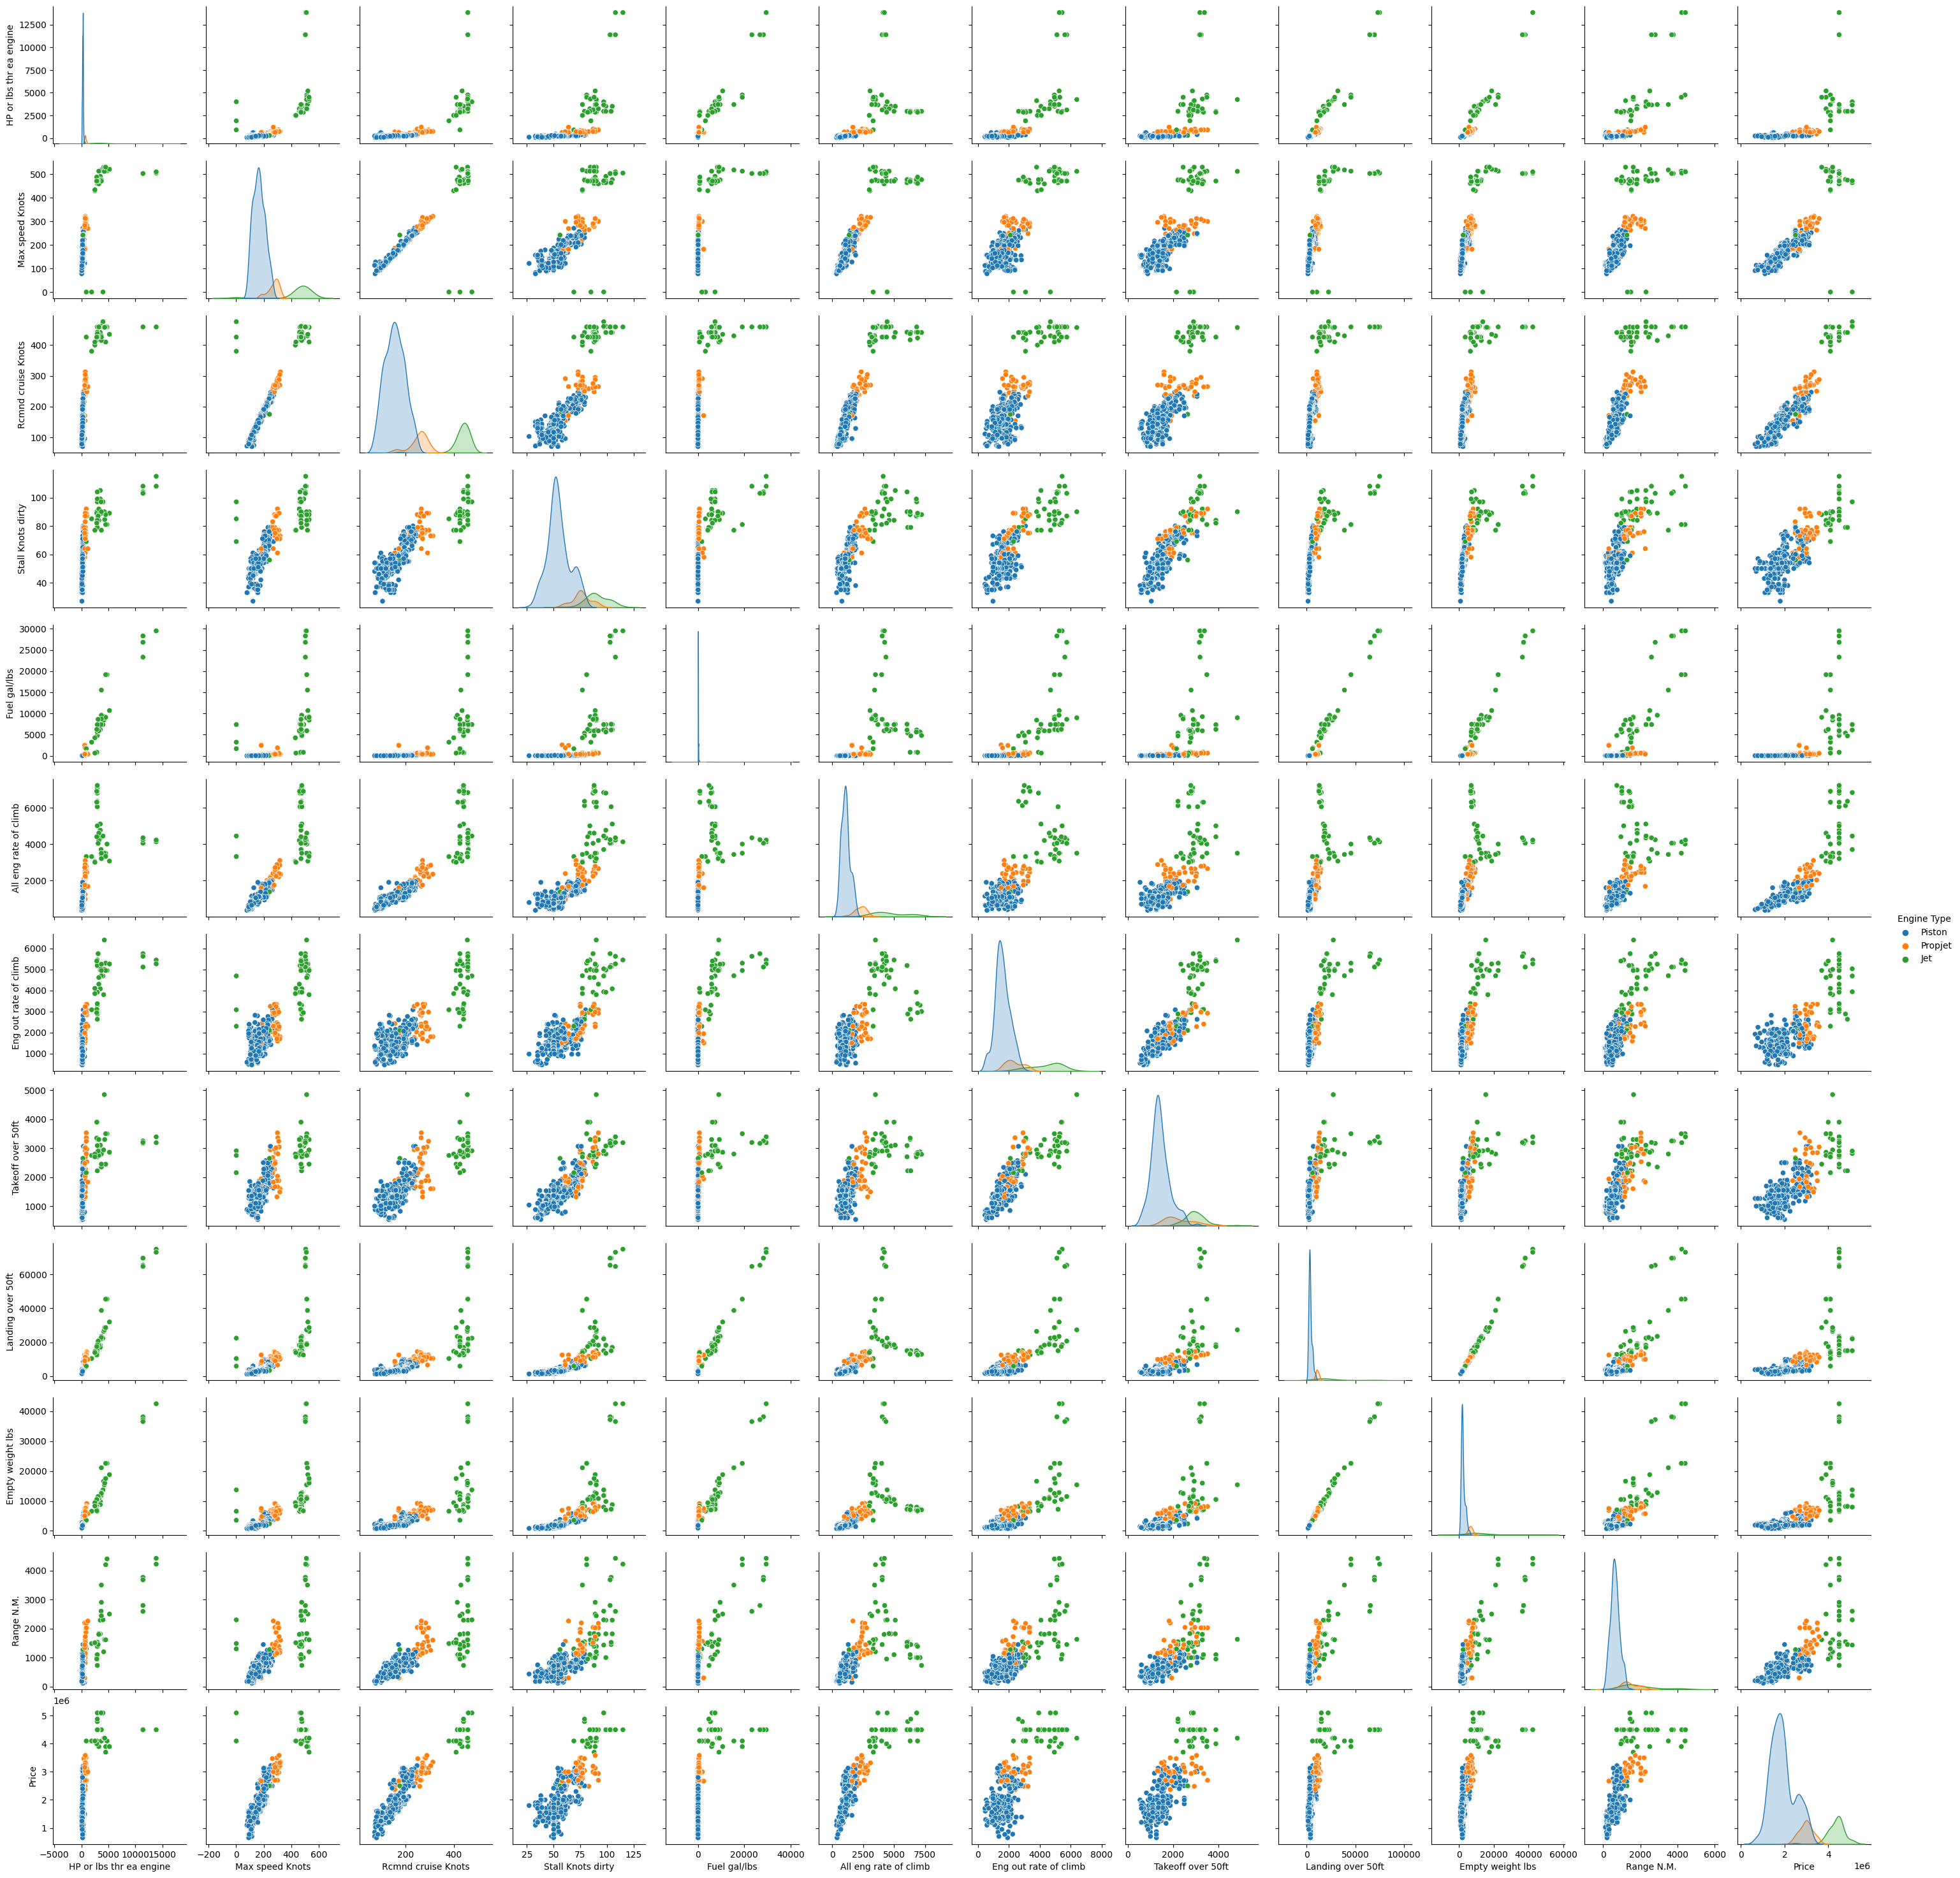

In [38]:
sns.pairplot(airplane, hue='Engine Type')

In [39]:
airplane.corr().round(2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\277638274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airplane.corr().round(2)


HP or lbs thr ea engine  Max speed Knots  \
HP or lbs thr ea engine                     1.00             0.72   
Max speed Knots                             0.72             1.00   
Rcmnd cruise Knots                          0.73             0.93   
Stall Knots dirty                           0.65             0.84   
Fuel gal/lbs                                0.96             0.67   
All eng rate of climb                       0.65             0.87   
Eng out rate of climb                       0.76             0.83   
Takeoff over 50ft                           0.61             0.80   
Landing over 50ft                           0.96             0.74   
Empty weight lbs                            0.96             0.74   
Range N.M.                                  0.78             0.76   
Price                                       0.65             0.88   

                         Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
HP or lbs thr ea engine                0.73               0.65          0.96   
Max speed Knots                        0.93               0.84          0.67   
Rcmnd cruise Knots                     1.00               0.88          0.67   
Stall Knots dirty                      0.88               1.00          0.58   
Fuel gal/lbs                           0.67               0.58          1.00   
All eng rate of climb                  0.92               0.80          0.56   
Eng out rate of climb                  0.85               0.80          0.73   
Takeoff over 50ft                      0.84               0.87          0.56   
Landing over 50ft                      0.75               0.71          0.96   
Empty weight lbs                       0.74               0.72          0.95   
Range N.M.                             0.79               0.76          0.79   
Price                                  0.95               0.85          0.59   

                         All eng rate of climb  Eng out rate of climb  \
HP or lbs thr ea engine                   0.65                   0.76   
Max speed Knots                           0.87                   0.83   
Rcmnd cruise Knots                        0.92                   0.85   
Stall Knots dirty                         0.80                   0.80   
Fuel gal/lbs                              0.56                   0.73   
All eng rate of climb                     1.00                   0.74   
Eng out rate of climb                     0.74                   1.00   
Takeoff over 50ft                         0.74                   0.86   
Landing over 50ft                         0.62                   0.77   
Empty weight lbs                          0.60                   0.77   
Range N.M.                                0.63                   0.77   
Price                                     0.87                   0.78   

                         Takeoff over 50ft  Landing over 50ft  \
HP or lbs thr ea engine               0.61               0.96   
Max speed Knots                       0.80               0.74   
Rcmnd cruise Knots                    0.84               0.75   
Stall Knots dirty                     0.87               0.71   
Fuel gal/lbs                          0.56               0.96   
All eng rate of climb                 0.74               0.62   
Eng out rate of climb                 0.86               0.77   
Takeoff over 50ft                     1.00               0.67   
Landing over 50ft                     0.67               1.00   
Empty weight lbs                      0.67               1.00   
Range N.M.                            0.74               0.86   
Price                                 0.81               0.67   

                         Empty weight lbs  Range N.M.  Price  
HP or lbs thr ea engine              0.96        0.78   0.65  
Max speed Knots                      0.74        0.76   0.88  
Rcmnd cruise Knots                   0.74        0.79   0.95  
Stall Knots dirty                    0

Berdasarkan tabel korelasi dan correlation map, dapat diketahui bahwa hubungan antarvariabel memiliki hubungan yang sedang hingga kuat dengan nilai berkisar 0.56 s.d. 1.

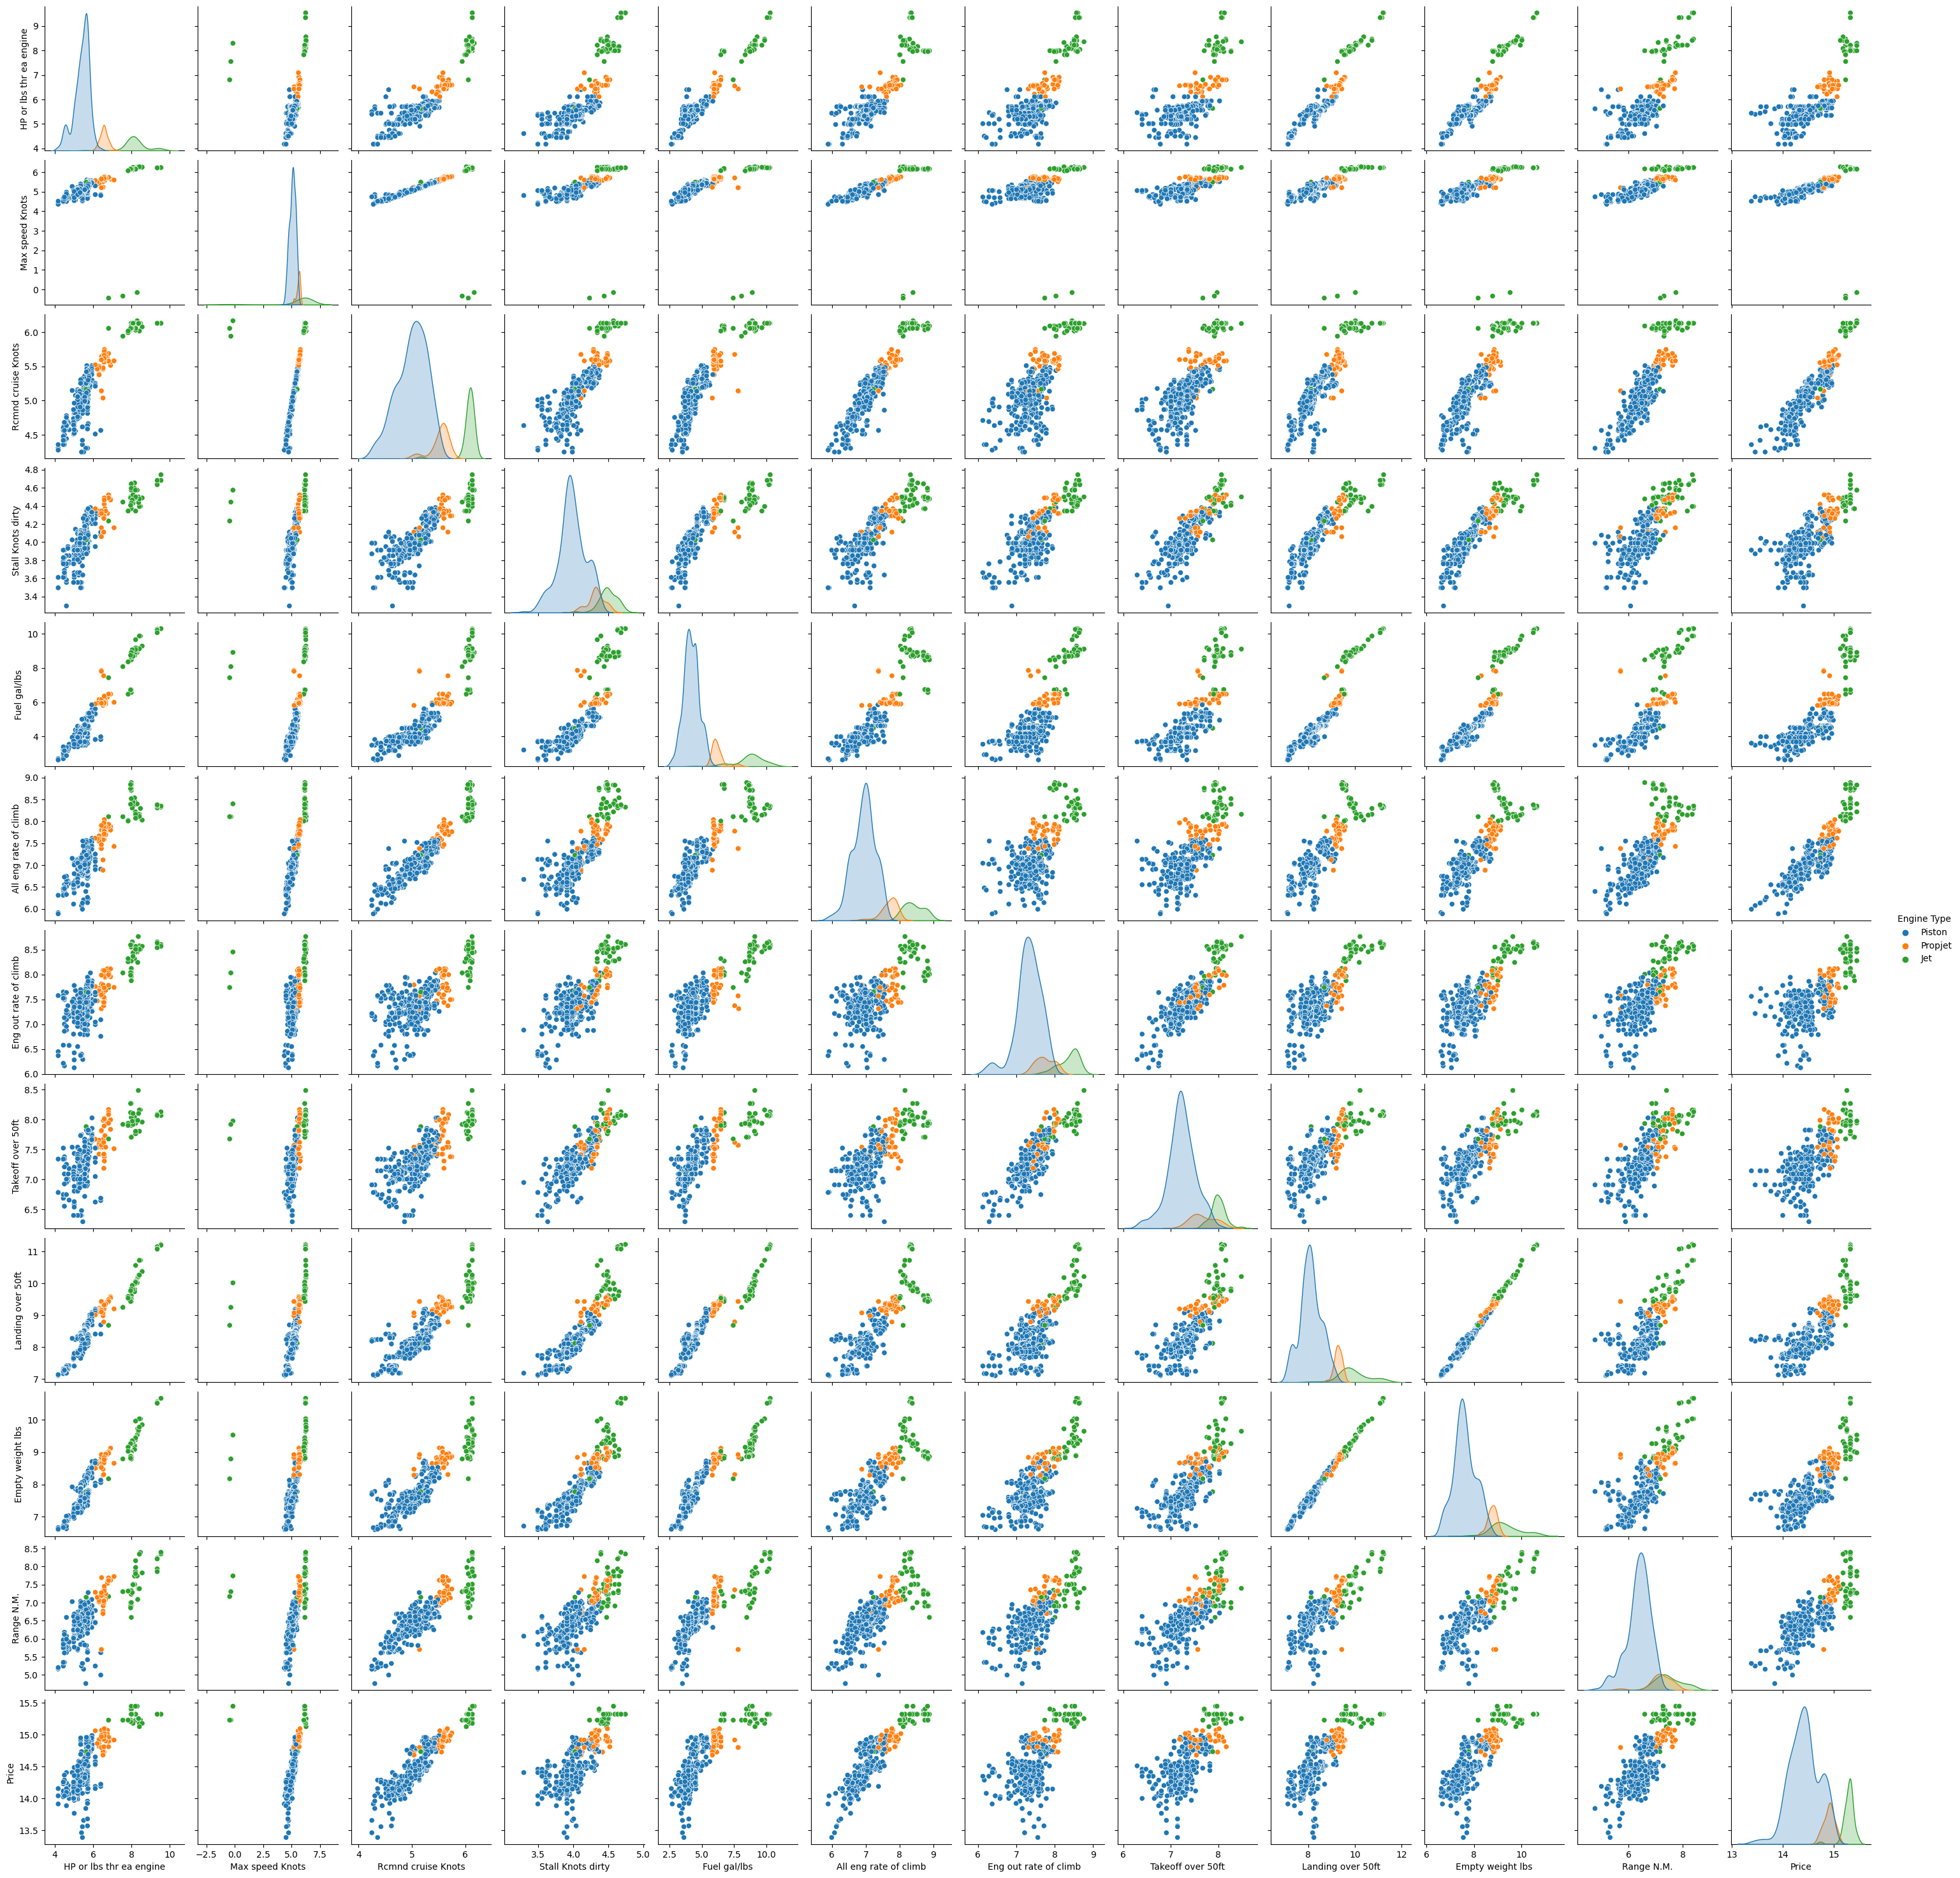

In [40]:
sns.pairplot(airplanelog, hue='Engine Type')

In [41]:
airplanelog.corr().round(2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\3879906863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airplanelog.corr().round(2)


HP or lbs thr ea engine  Max speed Knots  \
HP or lbs thr ea engine                     1.00             0.50   
Max speed Knots                             0.50             1.00   
Rcmnd cruise Knots                          0.88             0.54   
Stall Knots dirty                           0.83             0.51   
Fuel gal/lbs                                0.96             0.48   
All eng rate of climb                       0.88             0.52   
Eng out rate of climb                       0.77             0.42   
Takeoff over 50ft                           0.73             0.45   
Landing over 50ft                           0.94             0.54   
Empty weight lbs                            0.92             0.53   
Range N.M.                                  0.74             0.48   
Price                                       0.80             0.50   

                         Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
HP or lbs thr ea engine                0.88               0.83          0.96   
Max speed Knots                        0.54               0.51          0.48   
Rcmnd cruise Knots                     1.00               0.87          0.89   
Stall Knots dirty                      0.87               1.00          0.84   
Fuel gal/lbs                           0.89               0.84          1.00   
All eng rate of climb                  0.94               0.83          0.88   
Eng out rate of climb                  0.74               0.78          0.80   
Takeoff over 50ft                      0.80               0.86          0.79   
Landing over 50ft                      0.88               0.91          0.94   
Empty weight lbs                       0.88               0.91          0.93   
Range N.M.                             0.87               0.77          0.80   
Price                                  0.93               0.79          0.83   

                         All eng rate of climb  Eng out rate of climb  \
HP or lbs thr ea engine                   0.88                   0.77   
Max speed Knots                           0.52                   0.42   
Rcmnd cruise Knots                        0.94                   0.74   
Stall Knots dirty                         0.83                   0.78   
Fuel gal/lbs                              0.88                   0.80   
All eng rate of climb                     1.00                   0.65   
Eng out rate of climb                     0.65                   1.00   
Takeoff over 50ft                         0.73                   0.86   
Landing over 50ft                         0.85                   0.78   
Empty weight lbs                          0.85                   0.77   
Range N.M.                                0.77                   0.71   
Price                                     0.90                   0.65   

                         Takeoff over 50ft  Landing over 50ft  \
HP or lbs thr ea engine               0.73               0.94   
Max speed Knots                       0.45               0.54   
Rcmnd cruise Knots                    0.80               0.88   
Stall Knots dirty                     0.86               0.91   
Fuel gal/lbs                          0.79               0.94   
All eng rate of climb                 0.73               0.85   
Eng out rate of climb                 0.86               0.78   
Takeoff over 50ft                     1.00               0.80   
Landing over 50ft                     0.80               1.00   
Empty weight lbs                      0.81               0.99   
Range N.M.                            0.76               0.79   
Price                                 0.75               0.81   

                         Empty weight lbs  Range N.M.  Price  
HP or lbs thr ea engine              0.92        0.74   0.80  
Max speed Knots                      0.53        0.48   0.50  
Rcmnd cruise Knots                   0.88        0.87   0.93  
Stall Knots dirty                    0

# Statistical Test

Gunakan confidence level 95% dalam setiap uji statistik.

## Test 1

Apakah benar jika rata-rata harga pesawat sebesar 2.5 juta USD?

Hipotesis yang bisa dirumuskan dalam kasus ini:

- H0 : $\mu$ = 2.500.000
- H1 : $\mu$ $\ne$ 2.500.000

In [64]:
from scipy.stats import ttest_1samp

t_stat, p_val = ttest_1samp(
    a = airplane['Price'],
    popmean=2_500_000,
    alternative='two-sided'
)

print(f't-stat: {t_stat}\np-val: {p_val}' )

t-stat: -4.68784516950575
p-val: 3.7376668567906577e-06


Hasil uji statistik menunjukkan nilai p-value signifikan di bawah taraf nyata alpha 5% sehingga diperoleh kesimpulan tolak H0. Cukup bukti untuk mengindikasikan bahwa rata-rata harga pesawat tidak bernilai 2.500.000 USD.

## Test 2

Apakah tepat jika kita mengatakan bahwa rata-rata pesawat memiliki nilai ROCA atau All Engine Rate of Climb sebesar 1500?

Hipotesis yang bisa dirumuskan dalam kasus ini:

- H0 : $\mu$ = 1.500
- H1 : $\mu$ $\ne$ 1.500

In [69]:
from scipy.stats import ttest_1samp

t_stat, p_val = ttest_1samp(a = airplane['All eng rate of climb'], popmean=1500, alternative='two-sided')

print(f't-stat: {t_stat}\np-val: {p_val}' )

t-stat: 1.560134291015482
p-val: 0.1194813081143337


Hasil uji statistik menunjukkan nilai p-value tidak signifikan dalam taraf nyata alpha 5% sehingga diperoleh kesimpulan gagal tolak H0. Tidak cukup bukti untuk mengatakan bahwa rata-rata ROCA bernilai 1.500. Kemudian, berada dalam interval berapa nilai ROCA ini?

In [74]:
low, upper = ttest_1samp(a = airplane['All eng rate of climb'], popmean=1500, alternative='two-sided').confidence_interval()
print(f'Confidence interval berada pada kisaran {low.round(2)} dan {upper.round(2)}.')

Confidence interval berada pada kisaran 1474.71 dan 1719.89.


## Test 3

Tepatkah jika dikatakan jumlah pesawat dengan harga di atas rata-rata lebih sedikit?

Dalam uji statistik berikutnya, akan dilakukan uji proporsi dengan proporsi harga tiket pesawat di atas rata-rata (p1) dan proporsi harga tiket pesawat di bawah rata-rata (p2). Hipotesis yang bisa dirumuskan dalam kasus ini:

- H0 : p1 $\geq$ p2
- H1 : p1 $\lt$ p2

In [84]:
from statsmodels.stats.proportion import proportions_ztest

n_price_lower = airplane['Price'][airplane['Price'] < np.mean(airplane['Price'])].__len__()
n_price_upper = airplane['Price'][airplane['Price'] >= np.mean(airplane['Price'])].__len__()
n_airplane = airplane['Price'].__len__()

z_stat, p_value = proportions_ztest(
    count = n_price_upper, nobs = n_airplane, 
    value = n_price_lower, alternative = 'smaller')

print(f'z stat: {z_stat}\np-value : {p_value}')

z stat: -10689.73977091931
p-value : 0.0


Hasil uji statistik menunjukkan nilai p-value signifikan di bawah taraf nyata alpha 5% sehingga diperoleh kesimpulan tolak H0. Cukup bukti untuk mengindikasikan bahwa proporsi jumlah pesawat dengan harga tiket di atas rata-rata memang benar lebih sedikit.

## Test 4

Apakah benar jika ada asumsi yang mengatakan bahwa harga pesawat dengan tipe mesin piston lebih murah daripada harga pesawat dengan tipe mesin non-piston?

Dalam uji statistik berikutnya, akan dilakukan uji rataan dua populasi dengan rataan harga pesawat pada mesin piston ($\mu 1$) dan rataan harga pesawat dengan tipe mesin non piston ($\mu 2$). Hipotesis yang bisa dirumuskan dalam kasus ini:

- H0 : $\mu 1$ $\geq$ $\mu 2$
- H1 : $\mu 1$ $\lt$ $\mu 2$

In [94]:
pistondata = airplane[airplane['Engine Type']=='Piston']
nonpistondata = airplane[airplane['Engine Type']!='Piston']

np.var(pistondata['Price']) / np.var(nonpistondata['Price']) # maka ragam dianggap sama

0.5060637573787731

In [115]:
import scipy
statistic, p_value = scipy.stats.ttest_ind(pistondata['Price'], nonpistondata['Price'], 
                                           axis=0,
                                           equal_var=True, alternative='less')

print(f'z stat: {statistic}\np-value : {p_value}')

z stat: -24.892602944529784
p-value : 6.386684942402994e-85


Hasil uji statistik menunjukkan nilai p-value signifikan di bawah taraf nyata alpha 5% sehingga diperoleh kesimpulan tolak H0. Cukup bukti untuk mengindikasikan bahwa pesawat dengan tipe mesin piston memiliki harga yang lebih murah.

## Test 5

Apakah benar jika ada asumsi yang mengatakan bahwa pesawat dengan tipe mesin piston memiliki ukuran rata-rata horsepower (hp) yang lebih rendah hingga 500 daripada horsepower pada pesawat dengan tipe mesin non-piston?

Dalam uji statistik berikutnya, akan dilakukan uji rataan dua populasi pada horsepower pesawat bertipe mesin piston ($\mu 1$) dan horsepower pesawat bertipe mesin mesin non piston ($\mu 2$). Hipotesis yang bisa dirumuskan dalam kasus ini:

- H0 : $\mu 2$ - $\mu 1$ $\leq$ 500
- H1 : $\mu 2$ - $\mu 1$ $\gt$ 500

In [96]:
np.var(pistondata['HP or lbs thr ea engine']) / np.var(nonpistondata['HP or lbs thr ea engine']) # perbandingan sangat jauh, ragam dianggap berbeda

0.0008140203869862697

In [105]:
statistic, p_value = scipy.stats.ttest_ind(nonpistondata['HP or lbs thr ea engine'], pistondata['HP or lbs thr ea engine'], 
                                           equal_var=False, alternative='greater')

print(f'z stat: {statistic}\np-value : {p_value}')

z stat: 7.7453902714732665
p-value : 9.163961636505485e-12


Hasil uji statistik menunjukkan nilai p-value signifikan di bawah taraf nyata alpha 5% sehingga diperoleh kesimpulan tolak H0. Hasil ini menunjukkan bahwa tidak benar jika pesawat bertipe mesin piston memiliki nilai lebih rendah dengan selisih hingga 500 saja dibandingkan pesawat bertipe mesin nonpiston. Hasil uji statistik mengindikasikan bahwa selisih rataan horsepower pada pesawat bertipe nonpiston memiliki nilai lebih besar dengan selisih lebih dari 500 dibandingkan pesawat bertipe piston.

## Test 6

Apakah benar jika pesawat dengan tipe mesin non-piston memiliki rataan kecepatan lebih baik dalam kondisi stall?

Dalam uji statistik berikutnya, akan dilakukan uji rataan dua populasi dengan kecepatan pesawat dengan tipe mesin non piston ($\mu 2$) bernilai lebih baik (lebih besar) daripada kecepatan pesawat bertipe mesin piston ($\mu 1$) dalam kondisi stall. Hipotesis yang bisa dirumuskan dalam kasus ini:

- H0 : $\mu 2$ $\leq$ $\mu 1$
- H1 : $\mu 2$ $\gt$ $\mu 1$

In [106]:
np.var(pistondata['Stall Knots dirty']) / np.var(nonpistondata['Stall Knots dirty']) # ragam dianggap sama

0.7286316723143081

In [107]:
statistic, p_value = scipy.stats.ttest_ind(nonpistondata['Stall Knots dirty'], pistondata['Stall Knots dirty'], 
                                           equal_var=True, alternative='greater')

print(f'z stat: {statistic}\np-value : {p_value}')

z stat: 22.163327180776594
p-value : 6.854408653107894e-73


Hasil uji statistik menunjukkan nilai p-value signifikan di bawah taraf nyata alpha 5% sehingga diperoleh kesimpulan tolak H0. Hasil ini menunjukkan bahwa benar dan cukup bukti untuk mengindikasikan bahwa pesawat bertipe mesin nonpiston memiliki nilai kecepatan lebih baik dalam kondisi stall dibandingkan pesawat bertipe mesin piston. 

## Test 7

Dalam dataset yang digunakan, benarkah jumlah pesawat dengan range NM lebih dari 800 NM memiliki proporsi lebih banyak?

Dalam uji statistik berikutnya, akan dilakukan uji proporsi dengan proporsi pesawat dengan range NM lebih dari 800 NM (p1) dan proporsi pesawat dengan range NM tidak lebih dari 800 NM (p2). Hipotesis yang bisa dirumuskan dalam kasus ini:

- H0 : p1 $\leq$ p2
- H1 : p1 $\gt$ p2

In [112]:
from statsmodels.stats.proportion import proportions_ztest

n_range_lower = airplane[airplane['Range N.M.'] <= 800].__len__()
n_range_upper = airplane[airplane['Range N.M.'] > 800].__len__()
n_airplane = airplane.__len__()

z_stat, p_value = proportions_ztest(
    count = n_price_upper, nobs = n_airplane, 
    value = n_price_lower, alternative = 'larger')

print(f'z stat: {z_stat}\np-value : {p_value}')

z stat: -10689.73977091931
p-value : 1.0


Hasil uji statistik menunjukkan nilai p-value tidak signifikan dalam taraf nyata alpha 5% sehingga diperoleh kesimpulan gagal tolak H0. Tidak cukup bukti untuk mengindikasikan bahwa pesawat dengan range NM lebih dari 800 memiliki proporsi yang lebih besar.

# Regression Model

Selanjutnya, akan dilakukan rename kolom setiap data. Berikut rinciannya.

1. X1 : Model Name (obj) 
2. X2 : Engine Type (obj)
3. X3 : HP or lbs thr ea engine (float)
4. X4 : Max speed Knots (float) 
5. X5 : Rcmnd cruise Knots (float)
6. X6 : Stall Knots dirty (float) 
7. X7 : Fuel gal/lbs (float) 
8. X8 : All eng rate of climb (float) 
9. X9 : Eng out rate of climb (float) 
10. X10 : Takeoff over 50ft (float) 
11. X11 : Landing over 50ft (float)
12. X12 : Empty weight lbs (float)
13. X13 : Length ft/in (obj)
14. X14 : Wing span ft/in (obj)
15. X15 : Range N.M. (float)
16. Y : Price (float)
     

In [44]:
airplanelog.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 
                       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'Y']
airplanelog.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'Y'],
      dtype='object')

In [45]:
airplanes = airplane.copy()
airplanes.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 
                       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'Y']
airplanes.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'Y'],
      dtype='object')

## Modelling

In [46]:
import statsmodels.formula.api as smf

model1 = smf.ols('Y ~ X3 + X6 + X8 + X15', airplanes).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     561.5
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          3.76e-166
Time:                        06:48:03   Log-Likelihood:                -6002.0
No. Observations:                 421   AIC:                         1.201e+04
Df Residuals:                     416   BIC:                         1.203e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.41e+05   9.88e+04      3.451      0.001    1.47e+05    5.35e+05
X3           -45.7911     18.728     -2.445      0.015     -82.604      -8.979
X6          1.651e+04   2267.065      7.284      0.000    1.21e+04     2.1e+04
X8           399.9232     25.137     15.910      0.000     350.512     449.335
X15          393.1762     55.334      7.105      0.000     284.407     501.946
==============================================================================
Omnibus:                       16.251   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.352
Skew:                           0.497   Prob(JB):                     0.000171
Kurtosis:                       3.035   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
model2 = smf.ols('Y ~ C(X2) + X3 + X6 + X8 + X15', airplanes).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     384.9
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          6.95e-166
Time:                        06:48:03   Log-Likelihood:                -5996.2
No. Observations:                 421   AIC:                         1.201e+04
Df Residuals:                     414   BIC:                         1.203e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.805e+05   1.97e+05      4.473      0.000    4.94e+05    1.27e+06
C(X2)[T.Piston]  -5.186e+05   1.56e+05     -3.326      0.001   -8.25e+05   -2.12e+05
C(X2)[T.Propjet] -4.421e+05   1.37e+05     -3.219      0.001   -7.12e+05   -1.72e+05
X3                 -77.3350     21.471     -3.602      0.000    -119.540     -35.130
X6                1.838e+04   2331.010      7.885      0.000    1.38e+04     2.3e+04
X8                 304.8938     37.777      8.071      0.000     230.635     379.152
X15                365.2188     58.650      6.227      0.000     249.930     480.508
==============================================================================
Omnibus:                       13.730   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.409
Skew:                           0.453   Prob(JB):                     0.000743
Kurtosis:                       3.036   Cond. No.                     3.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model3 = smf.ols('Y ~ C(X2) + X3 + X6 + X8 + X15', airplanelog).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     344.3
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          1.81e-157
Time:                        06:48:03   Log-Likelihood:                 171.75
No. Observations:                 421   AIC:                            -329.5
Df Residuals:                     414   BIC:                            -301.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.7362      0.222     43.767      0.000       9.299      10.173
C(X2)[T.Piston]      0.0401      0.064      0.631      0.528      -0.085       0.165
C(X2)[T.Propjet]     0.0075      0.051      0.146      0.884      -0.093       0.108
X3                  -0.0072      0.026     -0.275      0.783      -0.059       0.044
X6                   0.0829      0.068      1.224      0.222      -0.050       0.216
X8                   0.4678      0.033     14.014      0.000       0.402       0.533
X15                  0.1740      0.023      7.597      0.000       0.129       0.219
==============================================================================
Omnibus:                       15.378   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.240
Skew:                           0.479   Prob(JB):                     0.000297
Kurtosis:                       3.078   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Uji Asumsi Klasik

In [49]:
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant

In [50]:
X = airplanes[['X3', 'X8', 'X6', 'X15']]

### Uji Linearitas

In [51]:
rainbow_statistic1, rainbow_p_value1 = linear_rainbow(model1)
rainbow_statistic2, rainbow_p_value2 = linear_rainbow(model2)
rainbow_statistic3, rainbow_p_value3 = linear_rainbow(model3)

print('Hasil Uji Linearitas:')
print(f"Model 1, P-Value: {rainbow_p_value1}")
print(f"Model 2, P-Value: {rainbow_p_value2}")
print(f"Model 3, P-Value: {rainbow_p_value3}")

Hasil Uji Linearitas:
Model 1, P-Value: 0.17635799946960426
Model 2, P-Value: 0.22932518547563543
Model 3, P-Value: 0.48569020586803935


### Uji Autokorelasi

In [52]:
durbin_watson_pvalue1 = durbin_watson(model1.pvalues)
durbin_watson_pvalue2 = durbin_watson(model2.pvalues)
durbin_watson_pvalue3 = durbin_watson(model3.pvalues)

print('Uji Autokorelasi Durbin-Watson:')
print(f"Model 1, P-Value: {durbin_watson_pvalue1}")
print(f"Model 2, P-Value: {durbin_watson_pvalue2}")
print(f"Model 3, P-Value: {durbin_watson_pvalue3}")

Uji Autokorelasi Durbin-Watson:
Model 1, P-Value: 1.9156185144804798
Model 2, P-Value: 0.7670329725525552
Model 3, P-Value: 0.4527771232892905


### Uji Homogenitas

In [53]:
_, bp_p_value1, _, _ = het_breuschpagan(model1.resid, X)
_, bp_p_value2, _, _ = het_breuschpagan(model2.resid, X)
_, bp_p_value3, _, _ = het_breuschpagan(model3.resid, X)

print('Hasil Uji Breusch-Pagan:')
print(f"Model 1, P-Value: {bp_p_value1}")
print(f"Model 2, P-Value: {bp_p_value2}")
print(f"Model 3, P-Value: {bp_p_value3}")

Hasil Uji Breusch-Pagan:
Model 1, P-Value: 2.451160815955398e-32
Model 2, P-Value: 1.135337728573148e-31
Model 3, P-Value: 2.9200849808863535e-32


### Uji Multikolinearitas

In [54]:
# Menghitung VIF untuk setiap variabel independen
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [VIF(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable       VIF
0       X3  3.356443
1       X8  6.256846
2       X6  9.533684
3      X15  9.557377


## Evaluasi Model

In [55]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE, mean_squared_error as MSE, mean_absolute_error as MAE

In [56]:
# Evaluasi Model 1
r2_m1 = model1.rsquared
r2_adjusted_m1 = model1.rsquared_adj
aic_m1 = model1.aic
bic_m1 = model1.bic
rmse_m1 = np.sqrt(MSE(airplanes['Y'], model1.fittedvalues))
mae_m1 = MAE(airplanes['Y'], model1.fittedvalues)
mape_m1 = MAPE(airplanes['Y'], model1.fittedvalues)

In [57]:
# Evaluasi Model 2
r2_m2 = model2.rsquared
r2_adjusted_m2 = model2.rsquared_adj
aic_m2 = model2.aic
bic_m2 = model2.bic
rmse_m2 = np.sqrt(MSE(airplanes['Y'], model2.fittedvalues))
mae_m2 = MAE(airplanes['Y'], model2.fittedvalues)
mape_m2 = MAPE(airplanes['Y'], model2.fittedvalues)

In [58]:
# Evaluasi Model 3
r2_m3 = model3.rsquared
r2_adjusted_m3 = model3.rsquared_adj
aic_m3 = model3.aic
bic_m3 = model3.bic
rmse_m3 = np.sqrt(MSE(airplanes['Y'], model3.fittedvalues))
mae_m3 = MAE(airplanes['Y'], model3.fittedvalues)
mape_m3 = MAPE(airplanes['Y'], model3.fittedvalues)

In [59]:
eval_1 = [r2_m1, r2_adjusted_m1, aic_m1, bic_m1, rmse_m1, mae_m1, mape_m1]
eval_2 = [r2_m2, r2_adjusted_m2, aic_m2, bic_m2, rmse_m2, mae_m2, mape_m2]
eval_3 = [r2_m3, r2_adjusted_m3, aic_m3, bic_m3, rmse_m3, mae_m3, mape_m3]

hasil_evaluasi_model = pd.DataFrame({'Model 1':eval_1, 'Model 2': eval_2,'Model 3':eval_3,
                                     'Parameter Evaluasi': ['R2', 'R2 Adjusted', 'AIC', 'BIC', 'RMSE', 'MAE', 'MAPE']})
hasil_evaluasi_model.set_index('Parameter Evaluasi', inplace=True)
hasil_evaluasi_model.round(2)

Model 1    Model 2     Model 3
Parameter Evaluasi                                  
R2                       0.84       0.85        0.83
R2 Adjusted              0.84       0.85        0.83
AIC                  12014.02   12006.37     -329.50
BIC                  12034.23   12034.67     -301.20
RMSE                376102.45  370934.96  2472715.40
MAE                 297967.02  296020.06  2282359.55
MAPE                     0.15       0.15        1.00

# Result

Berdasarkan hasil evaluasi model, model terbaik dimiliki oleh model 2. Model 2 dibangun menggunakan data `airplanes` dengan variabel respon Y, yaitu price. Model ini dibangun atas sejumlah variabel bebas X, meliputi X2, X3, X6, X8, dan X15 yang secara berurutan merepresentasikan variabel engine type, HP (horse power) or lbs thr ea engine, stall knots dirty, all eng rate of climb, dan range N. M.

In [60]:
print_coef_std_err(model2)

coef        std_err
Intercept         880476.578895  196859.169887
C(X2)[T.Piston]  -518582.960498  155918.200498
C(X2)[T.Propjet] -442101.601819  137356.181990
X3                   -77.334993      21.470762
X6                 18379.019183    2331.010386
X8                   304.893775      37.776929
X15                  365.218787      58.650071

Model 2 memiliki persamaan sebagai berikut:

`Y = 880.476,58 - 518.582,96 x X2(Piston) - 442.101,6 x X2(Propjet) - 77,33 x X3 + 18.379,02 x X6 + 304,89 x X8 + 365,22 x X15 `

di mana X2 acuan adalah untuk kategori X2 = jet.

atau 

`Price = 880.476,58 - 518.582,96 x Piston Engine Type - 442.101,6 x Propjet Engine Type - 77,33 x Horse Power + 18.379,02 x Stall Knots Dirty + 304,89 x All Eng Rate of Climb + 365,22 x Range NM `

Namun, persamaan seperti ini akan sulit untuk diinterpretasikan sehingga akan dilakukan pemusatan melalui z-score.


In [61]:
from sklearn.preprocessing import StandardScaler

airplanestd = airplanes.copy()
airplanestd[['X3','X6','X8','X15']] = StandardScaler().fit_transform(airplanestd[['X3','X6','X8','X15']])

# Untuk variabel kategorik ini, akan dilakukan proses dummy dan standarisasi 2*z score
# Buat Kolom T.Piston 
airplanestd['XPiston'] = 0
airplanestd['XPiston'][airplanestd['X2']=='Piston'] = 1
airplanestd['XPiston'] = (airplanestd['XPiston'] - np.mean(airplanestd['XPiston']))/(2*np.std(airplanestd['XPiston']))

# Buat Kolom T.Propjet 
airplanestd['XPropjet'] = 0
airplanestd['XPropjet'][airplanestd['X2']=='Propjet'] = 1
airplanestd['XPropjet'] = (airplanestd['XPropjet'] - np.mean(airplanestd['XPropjet']))/(2*np.std(airplanestd['XPropjet']))

# Buat Kolom T.Jet 
airplanestd['XJet'] = 0
airplanestd['XJet'][airplanestd['X2']=='Jet'] = 1
airplanestd['XJet'] = (airplanestd['XJet'] - np.mean(airplanestd['XJet']))/(2*np.std(airplanestd['XJet']))

C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\4027986484.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplanestd['XPiston'][airplanestd['X2']=='Piston'] = 1
C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\4027986484.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplanestd['XPropjet'][airplanestd['X2']=='Propjet'] = 1
C:\Users\ACER\AppData\Local\Temp\ipykernel_17424\4027986484.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [62]:
modelzs = smf.ols('Y ~ XPiston + XPropjet + XJet + X3 + X6 + X8 + X15', airplanestd).fit()
print_coef_std_err(modelzs)

coef       std_err
Intercept  2.282374e+06  18230.458894
XPiston   -1.349264e+05  45982.047548
XPropjet  -5.267892e+04  32943.968327
XJet       2.212335e+05  64990.694163
X3        -1.289844e+05  35810.345003
X6         2.956230e+05  37493.856412
X8         3.897010e+05  48284.703693
X15        2.285182e+05  36697.471180

Setelah dilakukan centering dan standarisasi, dapat diperoleh persamaan sebagai berikut.


`Price = 2.282.374 - 134.926,4 x Z2_Piston - 52.678,9 x Z2_Propjet + 221.233,5 x Z2_Jet - 128.984,4 x Z_HorsePower + 295.623 x Z_StallKnotsDirty + 389.701 x Z_AllEngRateofClimb + 228.518,2 x Z_RangeNM `

Dari sini, kita bisa mengetahui bahwa harga rata-rata pesawat sebesar 2.282.374 USD.

# Conclusion

Dalam membangun sebuah model regresi, tidak seluruh variabel yang kita miliki dapat digunakan (dalam kasus multiple regresion). Pada kasus pemodelan regresi linear pada dataset harga tiket pesawat, hanya 4 variabel saja yang dapat digunakan untuk membangun model. Keempat variabel ini memenuhi uji VIF dengan nilai VIF kurang dari 10. Keempat variabel tersebut meliputi variabel dummy tipe mesin, horse power, stall knots dirty, ROCA, dan range NM. Rata-rata harga pesawat dengan pada kondisi dummy secara umum senilai 2.282.374 USD. 

# Reference

https://www.kaggle.com/datasets/rafsunahmad/plane-price-prediction/data